In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

In [2]:

sns.set_style("ticks")

plt.rcParams['font.family'] = 'Arial'


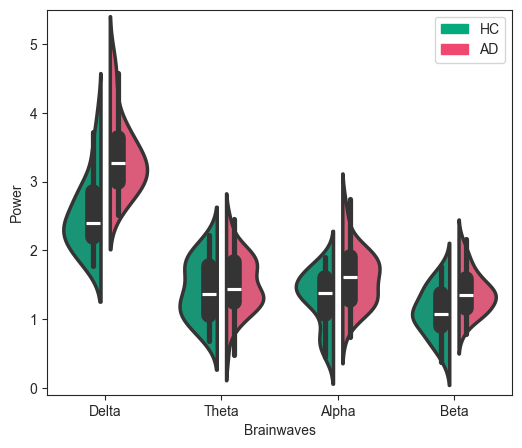

In [3]:
data = pd.read_csv('fullP.csv', header=None)

matrix_HC = data.iloc[:40, :]
matrix_AD = data.iloc[40:, :]

colors = ['#04a97e','#ef476f']

# Tạo dữ liệu mẫu (ví dụ)
f_range = ['Delta', 'Theta', 'Alpha', 'Beta']

# Khởi tạo subplot và trục chung
fig, axes = plt.subplots(sharex=True, sharey=True, figsize=(6, 5), frameon=False)

for i in range(4):
    matrix_HC = data.iloc[:40, :]
    matrix_AD = data.iloc[40:, :]
    
    matrix_HC = matrix_HC.values
    matrix_AD = matrix_AD.values
    
    matrix_HC = np.log10(matrix_HC[:,i])
    matrix_AD = np.log10(matrix_AD[:,i])
    
    df_HC = pd.DataFrame({f_range[i]: matrix_HC, 'Group': 'HC{}'.format(i)})
    df_AD = pd.DataFrame({f_range[i]: matrix_AD, 'Group': 'AD{}'.format(i)})
    
    df = pd.concat([df_HC, df_AD])

    df = pd.melt(df, id_vars='Group', var_name = "Brainwaves", value_name='Power')

    # Violin plot
    violin = sns.violinplot(data=df, x="Brainwaves", y='Power', hue='Group', gap=.2, gridsize=1000,
                            split=True, inner= 'box', palette = colors, fill = True,
                            ax=axes, linewidth=2.5, legend = False)

    axes.set_ylim(-0.1, 5.5)
HC_color = mpatches.Patch(color=colors[0], label='HC')
AD_color = mpatches.Patch(color=colors[1], label='AD')
plt.legend(handles=[HC_color, AD_color])

plt.savefig('violin_plot01.png')
plt.show()


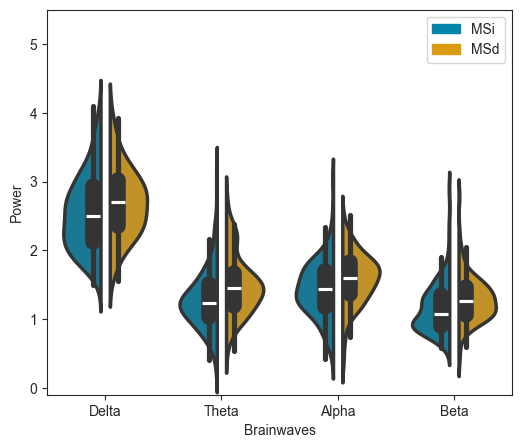

In [5]:
data = pd.read_csv('fullPMS.csv', header=None)

# Plot intact - decreased

colors = ['#0485a9','#d99c0e']

f_range = ['Delta', 'Theta', 'Alpha', 'Beta']

fig, axes = plt.subplots(sharex=True, sharey=True, figsize=(6, 5), frameon=False)

for i in range(4):
    matrix_MSd = data.iloc[:129, :]
    matrix_MSi = data.iloc[129:, :]
    
    matrix_MSd = matrix_MSd.values
    matrix_MSi = matrix_MSi.values
    
    matrix_MSd = np.log10(matrix_MSd[:,i])
    matrix_MSi = np.log10(matrix_MSi[:,i])
    
    df_MSd = pd.DataFrame({f_range[i]: matrix_MSd, 'Group': 'MSd{}'.format(i)})
    df_MSi = pd.DataFrame({f_range[i]: matrix_MSi, 'Group': 'MSi{}'.format(i)})
    
    df = pd.concat([df_MSi, df_MSd])

    df = pd.melt(df, id_vars='Group', var_name = "Brainwaves", value_name='Power')

    # Violin plot
    violin = sns.violinplot(data=df, x="Brainwaves", y='Power', hue='Group', gap=.2, gridsize=1000,
                            split=True, inner= 'box', palette = colors, fill = True,
                            ax=axes, linewidth=2.5, legend = False)

    axes.set_ylim(-0.1, 5.5)
    

MSi_color = mpatches.Patch(color=colors[0], label='MSi')
MSd_color = mpatches.Patch(color=colors[1], label='MSd')

plt.legend(handles=[MSi_color, MSd_color])

plt.savefig('violin_plot02.png')
plt.show()
